In [1]:
import json
import pandas as pd
from datetime import datetime 
from datetime import timedelta
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import *

In [2]:
f = open('ultimate_data_challenge.json')

In [3]:
data = json.load(f)

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

# Feature Engineering

In [8]:
#1.adding 'retained' column for prediction : true for those who took trip in 6th month after signup in january i.e
# after 5th mnths and during/after 6th month
#2. 'days_of_service' : total no. of days rider took the service

In [9]:
df_temp = df.copy()

In [10]:
df_temp['last_trip_date'] = pd.to_datetime(df_temp['last_trip_date'])
df_temp['signup_date'] = pd.to_datetime(df_temp['signup_date'])


In [11]:
df_temp['date_after_5mnths'] = df_temp['signup_date']+timedelta(5 * 30)

In [12]:
df_temp['date_after_5mnths']

0       2014-06-24
1       2014-06-28
2       2014-06-05
3       2014-06-09
4       2014-06-26
           ...    
49995   2014-06-24
49996   2014-06-23
49997   2014-06-30
49998   2014-06-13
49999   2014-06-17
Name: date_after_5mnths, Length: 50000, dtype: datetime64[ns]

In [13]:
df_temp['retained']= df_temp.last_trip_date >= df_temp['date_after_5mnths']

In [14]:
df_temp['retained']

0        False
1        False
2        False
3         True
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: retained, Length: 50000, dtype: bool

In [15]:
df_temp['retained'].value_counts(normalize=True)

False    0.74572
True     0.25428
Name: retained, dtype: float64

In [16]:
# around 25% of riders are retained

In [17]:
#get the no. of days user took the service
df_temp['days_of_service'] = df_temp['last_trip_date']-df_temp['signup_date']

In [18]:
df_temp['days_of_service'] = df_temp['days_of_service'].apply(lambda x : x.days)

In [19]:
df_temp['active_user']=df_temp['trips_in_first_30_days'].apply(lambda x : '1' if x>0 else '0')

In [20]:
df_temp['avg_rating_of_driver'].value_counts()

5.0    20771
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.7        2
1.8        2
1.9        1
1.6        1
2.2        1
Name: avg_rating_of_driver, dtype: int64

In [21]:
#adding 2 new columns on the basis of rating : 0:poor, 1:average, 2 good , 3 excellent

In [22]:
df_temp['trip_rating']=pd.cut(df_temp['avg_rating_by_driver'], bins=[0,2,3,4,5],labels=[0,1,2,3])

In [23]:
df_temp['driver_rating']=pd.cut(df_temp['avg_rating_of_driver'], bins=[0,2,3,4,5],labels=[0,1,2,3])

In [24]:
df_temp['trip_rating']

0        3
1        3
2        3
3        3
4        3
        ..
49995    3
49996    2
49997    3
49998    2
49999    3
Name: trip_rating, Length: 50000, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [25]:
df_temp['avg_dist'].value_counts()

0.00     150
2.29     116
2.30     116
2.36     114
2.73     114
        ... 
25.07      1
22.34      1
25.43      1
25.78      1
30.39      1
Name: avg_dist, Length: 2908, dtype: int64

In [26]:
#column 'avg_dist' is not useful in prediction , we can drop it because we are interested in whether the user 
# has taken trip or not 
df_temp.drop('avg_dist', axis=1, inplace=True)
df_temp.drop(['avg_rating_by_driver','avg_rating_of_driver'], axis=1, inplace=True)
df_temp.drop(['last_trip_date','signup_date'], axis=1, inplace=True)
df_temp.drop(['trips_in_first_30_days'], axis=1, inplace=True)

<AxesSubplot:>

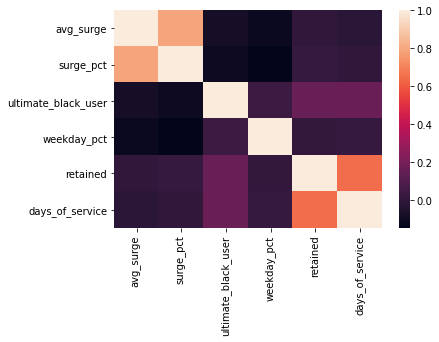

In [27]:
sns.heatmap(df_temp.corr())

In [28]:
df_temp.corr().loc['retained'].sort_values(ascending=False)

retained               1.000000
days_of_service        0.650272
ultimate_black_user    0.163169
surge_pct              0.017825
weekday_pct            0.007811
avg_surge              0.006780
Name: retained, dtype: float64

In [29]:
# as expected new column 'days of service' is highly correlated with 'retained'

In [30]:
# correlation between categorical columns

In [31]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   city                 50000 non-null  object        
 1   avg_surge            50000 non-null  float64       
 2   phone                49604 non-null  object        
 3   surge_pct            50000 non-null  float64       
 4   ultimate_black_user  50000 non-null  bool          
 5   weekday_pct          50000 non-null  float64       
 6   date_after_5mnths    50000 non-null  datetime64[ns]
 7   retained             50000 non-null  bool          
 8   days_of_service      50000 non-null  int64         
 9   active_user          50000 non-null  object        
 10  trip_rating          49799 non-null  category      
 11  driver_rating        41878 non-null  category      
dtypes: bool(2), category(2), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage

In [32]:
df_cat = df_temp[['city','phone','ultimate_black_user',]]

In [33]:
df_cat = pd.get_dummies(df_cat)

In [34]:
df_cat['ultimate_black_user'].value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [35]:
df_cat['ultimate_black_user'] = df_cat['ultimate_black_user'].apply(lambda x : 1 if x==True else 0)

In [36]:
df_cat['retained'] = df_temp['retained']

<AxesSubplot:>

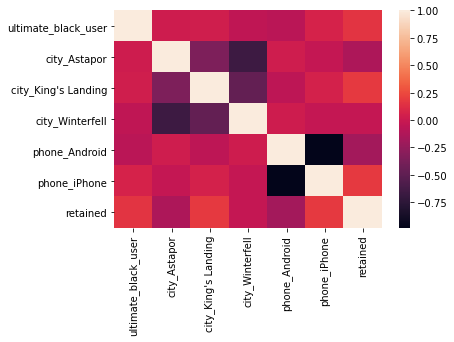

In [37]:
sns.heatmap(df_cat.corr())

In [38]:
df_cat.corr()['retained'].sort_values(ascending=False)

retained               1.000000
city_King's Landing    0.187189
phone_iPhone           0.180158
ultimate_black_user    0.163169
city_Winterfell       -0.023833
city_Astapor          -0.134652
phone_Android         -0.179908
Name: retained, dtype: float64

In [39]:
# here we see that being from King's Landing and using an iPhone are associated with being retained. 

In [40]:
# Lets fill null values before building the model

In [41]:
df_temp.isnull().sum()

city                      0
avg_surge                 0
phone                   396
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
date_after_5mnths         0
retained                  0
days_of_service           0
active_user               0
trip_rating             201
driver_rating          8122
dtype: int64

In [42]:
#fill null values for 'phone'
mode = df_temp['phone'].mode()[0]

df_temp['phone'].fillna(mode,inplace=True)

In [43]:
#lets drop date after 5th month column
df_temp.drop('date_after_5mnths',axis=1,inplace=True)

In [44]:
# lets split data before filling nan values

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [46]:
X = df_temp.drop('retained', axis=1)
y=df_temp['retained']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
X_test.shape, y_test.shape

((15000, 10), (15000,))

In [49]:
X_train.isnull().sum()

city                      0
avg_surge                 0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
days_of_service           0
active_user               0
trip_rating             140
driver_rating          5682
dtype: int64

In [50]:
X_train

,city,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,days_of_service,active_user,trip_rating,driver_rating
38094,Astapor,1.00,Android,0.0,False,0.0,0,1,3,3
40624,Astapor,1.00,iPhone,0.0,True,0.0,0,1,3,NaN
49425,Astapor,1.00,Android,0.0,False,0.0,0,1,3,3
35734,Winterfell,1.23,iPhone,14.3,False,28.6,176,1,3,3
41708,King's Landing,1.00,iPhone,0.0,True,70.6,154,1,3,3
...,...,...,...,...,...,...,...,...,...,...
11284,Winterfell,1.00,Android,0.0,False,100.0,11,1,3,2
44732,King's Landing,1.00,iPhone,0.0,True,100.0,145,1,3,3
38158,Winterfell,1.00,Android,0.0,False,0.0,149,1,3,3
860,Winterfell,1.00,iPhone,0.0,False,100.0,119,0,3,3


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 38094 to 15795
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   city                 35000 non-null  object  
 1   avg_surge            35000 non-null  float64 
 2   phone                35000 non-null  object  
 3   surge_pct            35000 non-null  float64 
 4   ultimate_black_user  35000 non-null  bool    
 5   weekday_pct          35000 non-null  float64 
 6   days_of_service      35000 non-null  int64   
 7   active_user          35000 non-null  object  
 8   trip_rating          34860 non-null  category
 9   driver_rating        29318 non-null  category
dtypes: bool(1), category(2), float64(3), int64(1), object(3)
memory usage: 2.2+ MB


In [52]:
#simpleimputer for 
#phone, trip_rating, driver_rating
# one hot encoding for columns:
#     city, phone, ultimate_black_user, 
# ordinal_encoding for columns:
#     trip_rating, driver_rating

In [53]:
si = SimpleImputer()
ohr = OneHotEncoder()
ordn = OrdinalEncoder()

In [54]:
#Column Transformer for imputing, one hot encoding and scaling

In [55]:
trf1 = ColumnTransformer([('si_imp2',SimpleImputer(strategy='most_frequent'),['trip_rating','driver_rating']),
                         ('one_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),['city','phone','ultimate_black_user']),
                         ('scaler',StandardScaler(),['avg_surge','surge_pct','weekday_pct','days_of_service'])],
                         remainder='passthrough')

In [56]:
pipe = Pipeline([('trf1',trf1)])

In [57]:
transformed_x_train = pipe.fit_transform(X_train)

In [58]:
transformed_x_train = pd.DataFrame(transformed_x_train)

In [59]:
X_train

,city,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,days_of_service,active_user,trip_rating,driver_rating
38094,Astapor,1.00,Android,0.0,False,0.0,0,1,3,3
40624,Astapor,1.00,iPhone,0.0,True,0.0,0,1,3,NaN
49425,Astapor,1.00,Android,0.0,False,0.0,0,1,3,3
35734,Winterfell,1.23,iPhone,14.3,False,28.6,176,1,3,3
41708,King's Landing,1.00,iPhone,0.0,True,70.6,154,1,3,3
...,...,...,...,...,...,...,...,...,...,...
11284,Winterfell,1.00,Android,0.0,False,100.0,11,1,3,2
44732,King's Landing,1.00,iPhone,0.0,True,100.0,145,1,3,3
38158,Winterfell,1.00,Android,0.0,False,0.0,149,1,3,3
860,Winterfell,1.00,iPhone,0.0,False,100.0,119,0,3,3


In [60]:
transformed_x_train


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.333651,-0.442572,-1.654848,-1.49369,1
1,3,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.333651,-0.442572,-1.654848,-1.49369,1
2,3,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.333651,-0.442572,-1.654848,-1.49369,1
3,3,3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.696307,0.273545,-0.881178,1.336911,1
4,3,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.333651,-0.442572,0.25498,0.983086,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,3,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.333651,-0.442572,1.050291,-1.316778,1
34996,3,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.333651,-0.442572,1.050291,0.838339,1
34997,3,3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.333651,-0.442572,-1.654848,0.902671,1
34998,3,3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.333651,-0.442572,1.050291,0.420182,0


In [61]:
transformed_x_test = pipe.transform(X_test)

In [62]:
#label encoder for y column

In [63]:
le = LabelEncoder()

In [64]:
y_train.shape, y_test.shape

((35000,), (15000,))

In [65]:
y_train = le.fit_transform(y_train)

In [66]:
y_test = le.transform(y_test)

In [67]:
y_test.shape

(15000,)

# Logistic Regression

In [117]:
#list for models and accuracy
list_model = ['Logistic Regression', 'Random Forest', 'KNN','Gradient Boosting']
list_acc = []
list_pr = []
list_recall = []

In [89]:
lr = LogisticRegression()

In [90]:
param_grid = {'penalty' : ['l2'],
              'C' : [0.5,1.0],
              'solver':['lbfgs'],
              'max_iter':[100,110,120]
             }

In [91]:
gd = GridSearchCV(estimator=lr,param_grid=param_grid, cv=5 )

In [92]:
gd.fit(transformed_x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1.0], 'max_iter': [100, 110, 120],
                         'penalty': ['l2'], 'solver': ['lbfgs']})

In [93]:
y_perd = gd.predict(transformed_x_test)

In [94]:
gd.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [118]:
# final model with best params

lr = LogisticRegression(penalty='l2',C=1.0,solver='lbfgs')

In [119]:
lr.fit(transformed_x_train, y_train)

LogisticRegression()

In [120]:
y_pred = lr.predict(transformed_x_test)

In [121]:
y_pred.shape, y_test.shape

((15000,), (15000,))

In [122]:
list_acc.append(accuracy_score(y_test, y_pred))

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11185
           1       1.00      1.00      1.00      3815

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


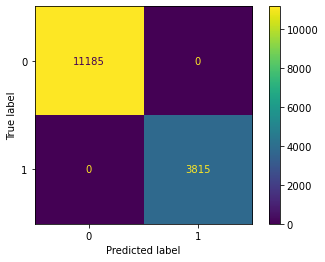

In [124]:
plot_confusion_matrix(lr,transformed_x_test,y_test)

In [125]:
list_pr.append(precision_score(y_test,y_pred)),
list_recall.append(recall_score(y_test,y_pred))

# Random Forest

In [103]:
rf = RandomForestClassifier()

In [104]:
#tune parameters for RandomForest
param_rf = { 'n_estimators':[50],
    'criterion':['gini'],
    'max_depth':[None,2,3,5],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2],
    'max_features':['sqrt'],
    'bootstrap':[True],
    'random_state':[42],
    'max_samples':[None,.50,.75],
    'ccp_alpha':[0.0,0.1]
           }

In [105]:
gd = GridSearchCV(estimator=rf,param_grid=param_rf, cv=5 )

In [107]:
gd.fit(transformed_x_train, y_train)

In [ ]:
y_pred = gd.predict(transformed_x_test)

In [ ]:
gd.best_params_

In [ ]:
# accuracy_score(y_test, y_pred)

In [126]:
#final Random Forest with best params
rf = RandomForestClassifier(bootstrap= True,
 criterion='gini',
 ccp_alpha= 0.0,
 max_depth= None,
 max_features='sqrt',
 max_leaf_nodes= None,
 max_samples=None,
 min_samples_leaf=1,
 min_samples_split=4,
 n_estimators=50,
 random_state=42)

In [127]:
rf.fit(transformed_x_train, y_train)

RandomForestClassifier(min_samples_split=4, n_estimators=50, random_state=42)

In [128]:
y_pred = rf.predict(transformed_x_test)

In [129]:

list_acc.append(accuracy_score(y_test, y_pred)),
list_pr.append(precision_score(y_test,y_pred)),
list_recall.append(recall_score(y_test,y_pred))

<AxesSubplot:>

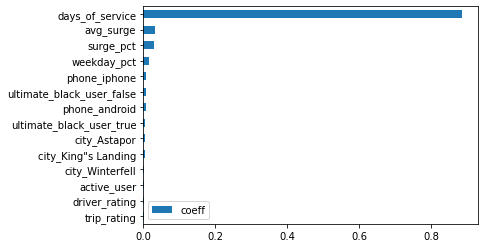

In [130]:
dt_feature = pd.DataFrame(rf.feature_importances_, columns=['coeff'] ,index=['trip_rating','driver_rating','city_Astapor','city_King"s Landing','city_Winterfell',
       'phone_android','phone_iphone','ultimate_black_user_false','ultimate_black_user_true','avg_surge','surge_pct','weekday_pct','days_of_service', 'active_user'])
dt_feature.sort_values(by='coeff').plot(kind='barh')

In [131]:
#from above graph its clear that days of service is the most important feature for prediction
#i.e those who are taking service since long after they signed for the service 

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11185
           1       1.00      1.00      1.00      3815

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


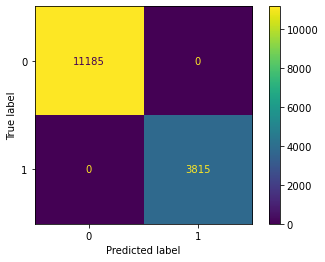

In [133]:
plot_confusion_matrix(rf,transformed_x_test,y_test)

# KNN Classifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': np.arange(1,10)}

In [ ]:
gd = GridSearchCV(estimator=knn,param_grid = param_grid, cv=5)

In [ ]:
gd.fit(transformed_x_train, y_train)

In [ ]:
y_pred = gd.predict(transformed_x_test)

In [ ]:
# accuracy_score(y_test,y_pred)

In [ ]:
gd.best_params_

In [135]:
#final model with best params
knn = KNeighborsClassifier(n_neighbors=1)

In [136]:
knn.fit(transformed_x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [137]:
y_pred= knn.predict(transformed_x_test)

/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


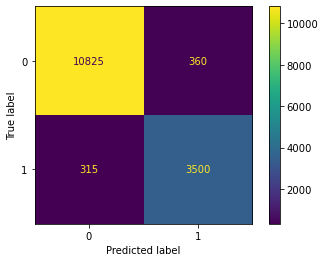

In [138]:
plot_confusion_matrix(knn,transformed_x_test,y_test)

In [139]:

list_acc.append(accuracy_score(y_test, y_pred)),
list_pr.append(precision_score(y_test,y_pred)),
list_recall.append(recall_score(y_test,y_pred))

# GradientBoostingClassifier

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

In [142]:
gbs = GradientBoostingClassifier()

In [ ]:
param_grid = {
    'learning_rate':[0.1,0.2],
    'n_estimators':[50],
    'max_depth':[3,4],
    'max_features':[None,],
    'ccp_alpha':[0.0,0.1]
}

In [ ]:
gd = GridSearchCV(estimator=gbs,param_grid = param_grid)

In [ ]:
gd.fit(transformed_x_train, y_train)

In [ ]:
y_pred = gd.predict(transformed_x_test)

In [ ]:
gd.best_params_

In [143]:
#final GDboost model
gbs = GradientBoostingClassifier(ccp_alpha= 0.0,
 learning_rate= 0.1,
 max_depth= 3,
 max_features= None,
 n_estimators= 50,
 random_state=42)

In [144]:
gbs.fit(transformed_x_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [145]:
y_pred = gbs.predict(transformed_x_test)

In [146]:
gbs.feature_importances_

array([ 2.58569458e-15,  2.13570767e-15,  0.00000000e+00,  0.00000000e+00,
        5.01077505e-18,  0.00000000e+00,  2.14223558e-15,  0.00000000e+00,
        0.00000000e+00, -9.52485230e-19,  1.41216733e-14,  1.42201942e-13,
        1.00000000e+00,  1.67473759e-20])

<AxesSubplot:>

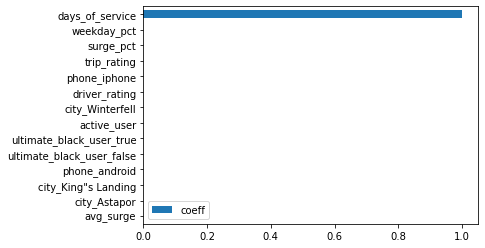

In [147]:
dt_feature = pd.DataFrame(gbs.feature_importances_, columns=['coeff'] ,index=['trip_rating','driver_rating','city_Astapor','city_King"s Landing','city_Winterfell',
       'phone_android','phone_iphone','ultimate_black_user_false','ultimate_black_user_true','avg_surge','surge_pct','weekday_pct','days_of_service', 'active_user'])
dt_feature.sort_values(by='coeff').plot(kind='barh')

In [148]:

list_acc.append(accuracy_score(y_test, y_pred)),
list_pr.append(precision_score(y_test,y_pred)),
list_recall.append(recall_score(y_test,y_pred))

/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


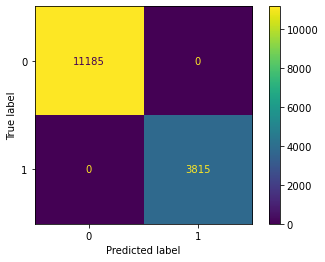

In [149]:
plot_confusion_matrix(gbs,transformed_x_test,y_test)

In [150]:
#models comparison:

In [152]:
pd.DataFrame(zip(list_model,list_acc,list_pr,list_recall), columns=['Model','accuracy score','precison score','recall_score']).set_index('Model')


,accuracy score,precison score,recall_score
Model,,,
Logistic Regression,1.000,1.000000,1.000000
Random Forest,1.000,1.000000,1.000000
KNN,0.955,0.906736,0.917431
Gradient Boosting,1.000,1.000000,1.000000
